In [1]:
import pandas as pd 
import os 
os.chdir(r'C:\Project Data\walmart-recruiting-store-sales-forecasting')



Features:
Store - the store number
Date - the week
Temperature - average temperature in the region
Fuel_Price - cost of fuel in the region
MarkDown1-5 - anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.
CPI - the consumer price index
Unemployment - the unemployment rate
IsHoliday - whether the week is a special holiday week

In [2]:
train = pd.read_csv('train.csv')
features = pd.read_csv('features.csv')
stores = pd.read_csv('stores.csv')

In [3]:
dataset = train.merge(features, how= 'left').merge(stores, how= 'left')

In [4]:
dataset

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221


In [5]:
new_data = dataset.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis= 1 )

In [6]:
new_data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,192.013558,8.684,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,192.170412,8.667,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,192.327265,8.667,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,192.330854,8.667,B,118221


In [7]:
new_data['day'] = pd.DatetimeIndex(new_data['Date']).day

new_data['year'] = pd.DatetimeIndex(new_data['Date']).year #Separating year data.
new_data['month'] = pd.DatetimeIndex(new_data['Date']).month

new_data['week_day'] = pd.DatetimeIndex(new_data['Date']).dayofweek 
#The day of the week with Monday=0, Sunday=6.


In [8]:
new_data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,day,year,month,week_day
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,5,2010,2,4
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315,12,2010,2,4
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315,19,2010,2,4
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315,26,2010,2,4
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315,5,2010,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,192.013558,8.684,B,118221,28,2012,9,4
421566,45,98,2012-10-05,628.10,False,64.89,3.985,192.170412,8.667,B,118221,5,2012,10,4
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,192.327265,8.667,B,118221,12,2012,10,4
421568,45,98,2012-10-19,760.01,False,56.47,3.969,192.330854,8.667,B,118221,19,2012,10,4


In [9]:
new_data['week_day'].value_counts()

4    421570
Name: week_day, dtype: int64

In [10]:
new_data.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Type', 'Size', 'day', 'year',
       'month', 'week_day'],
      dtype='object')

In [11]:
df_stats = new_data.groupby(['Store', 'Dept', 'week_day', 'day'])['Weekly_Sales'].agg(['mean', 'std'])
df_stats

mean           std
Store Dept week_day day                          
1     1    4        1    17980.3175   2634.918025
                    2    26855.0720  17442.866726
                    3    19066.4580   3623.256212
                    4    23316.9920   9452.847592
                    5    23638.2600   6890.424496
...                             ...           ...
45    98   4        27     829.4125    360.536438
                    28     462.6375    510.453733
                    29     615.0675    236.871133
                    30     512.3400    350.137646
                    31     210.2950    191.972420

[96380 rows x 2 columns]

In [12]:
df_stats = df_stats.reset_index()

In [13]:
df_stats

,Store,Dept,week_day,day,mean,std
0,1,1,4,1,17980.3175,2634.918025
1,1,1,4,2,26855.0720,17442.866726
2,1,1,4,3,19066.4580,3623.256212
3,1,1,4,4,23316.9920,9452.847592
4,1,1,4,5,23638.2600,6890.424496
...,...,...,...,...,...,...
96375,45,98,4,27,829.4125,360.536438
96376,45,98,4,28,462.6375,510.453733
96377,45,98,4,29,615.0675,236.871133
96378,45,98,4,30,512.3400,350.137646


In [14]:
df_stats['skew'] = new_data.groupby(['Store', 'Dept', 'week_day', 'day'])['Weekly_Sales'].skew().reset_index()['Weekly_Sales']

In [15]:
df_stats

,Store,Dept,week_day,day,mean,std,skew
0,1,1,4,1,17980.3175,2634.918025,-0.049597
1,1,1,4,2,26855.0720,17442.866726,1.968815
2,1,1,4,3,19066.4580,3623.256212,0.644712
3,1,1,4,4,23316.9920,9452.847592,2.018402
4,1,1,4,5,23638.2600,6890.424496,0.766164
...,...,...,...,...,...,...,...
96375,45,98,4,27,829.4125,360.536438,1.977475
96376,45,98,4,28,462.6375,510.453733,1.226863
96377,45,98,4,29,615.0675,236.871133,-0.699296
96378,45,98,4,30,512.3400,350.137646,-1.620968


In [16]:
df_stats['kurtosis'] = new_data.groupby(['Store', 'Dept', 'week_day', 'day'])['Weekly_Sales'].apply(pd.DataFrame.kurt).reset_index()['Weekly_Sales']
df_stats

,Store,Dept,week_day,day,mean,std,skew,kurtosis
0,1,1,4,1,17980.3175,2634.918025,-0.049597,-5.583822
1,1,1,4,2,26855.0720,17442.866726,1.968815,3.973965
2,1,1,4,3,19066.4580,3623.256212,0.644712,-3.075974
3,1,1,4,4,23316.9920,9452.847592,2.018402,4.211853
4,1,1,4,5,23638.2600,6890.424496,0.766164,1.701255
...,...,...,...,...,...,...,...,...
96375,45,98,4,27,829.4125,360.536438,1.977475,3.928107
96376,45,98,4,28,462.6375,510.453733,1.226863,0.607545
96377,45,98,4,29,615.0675,236.871133,-0.699296,1.092958
96378,45,98,4,30,512.3400,350.137646,-1.620968,2.491367


In [17]:
df_stats.isna().sum()

Store           0
Dept            0
week_day        0
day             0
mean            0
std          3327
skew         8381
kurtosis    10754
dtype: int64

Now we are applying same aggreagte function (mean , std , skew , Kurtosis) on new_data without 'day' field in groupby.

In [18]:
df_stats_wo_day = new_data.groupby(['Store', 'Dept', 'week_day'])['Weekly_Sales'].agg(['mean', 'std'])

In [19]:
df_stats_wo_day = df_stats_wo_day.reset_index()

In [20]:
df_stats_wo_day['skew'] = new_data.groupby(['Store', 'Dept', 'week_day'])['Weekly_Sales'].skew().reset_index()['Weekly_Sales']

In [21]:
df_stats_wo_day['kurt'] = new_data.groupby(['Store', 'Dept', 'week_day'])['Weekly_Sales'].apply(pd.DataFrame.kurt).reset_index()['Weekly_Sales']

In [22]:
df_stats_wo_day.isna().sum()

Store        0
Dept         0
week_day     0
mean         0
std         37
skew        67
kurt        86
dtype: int64

In [23]:
df_stats_wo_day

,Store,Dept,week_day,mean,std,skew,kurt
0,1,1,4,22513.322937,9854.349032,2.014053,3.360790
1,1,2,4,46102.090420,3440.673222,1.739372,8.112887
2,1,3,4,13150.478042,8708.978853,2.831282,8.044233
3,1,4,4,36964.154476,2930.698313,1.322673,2.602924
4,1,5,4,24257.941119,11330.286495,3.055369,11.464806
...,...,...,...,...,...,...,...
3326,45,94,4,3690.272090,1852.287364,-0.799490,0.104659
3327,45,95,4,52896.166643,5117.961708,0.757413,1.948497
3328,45,96,4,2.970000,0.042426,NaN,NaN
3329,45,97,4,6466.961888,659.739542,0.310045,0.826983


In [24]:
new_data = new_data.merge(df_stats_wo_day, how= 'left', on= ['Store','Dept'])

In [25]:
new_data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,day,year,month,week_day_x,week_day_y,mean,std,skew,kurt
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,5,2010,2,4,4,22513.322937,9854.349032,2.014053,3.360790
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315,12,2010,2,4,4,22513.322937,9854.349032,2.014053,3.360790
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315,19,2010,2,4,4,22513.322937,9854.349032,2.014053,3.360790
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315,26,2010,2,4,4,22513.322937,9854.349032,2.014053,3.360790
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315,5,2010,3,4,4,22513.322937,9854.349032,2.014053,3.360790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,192.013558,8.684,B,118221,28,2012,9,4,4,561.239037,371.286705,0.009460,-0.902266
421566,45,98,2012-10-05,628.10,False,64.89,3.985,192.170412,8.667,B,118221,5,2012,10,4,4,561.239037,371.286705,0.009460,-0.902266
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,192.327265,8.667,B,118221,12,2012,10,4,4,561.239037,371.286705,0.009460,-0.902266
421568,45,98,2012-10-19,760.01,False,56.47,3.969,192.330854,8.667,B,118221,19,2012,10,4,4,561.239037,371.286705,0.009460,-0.902266


In [26]:
new_data = new_data.drop(['week_day_y','Dept', 'Store'], axis= 1)

In [27]:
new_data

,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,day,year,month,week_day_x,mean,std,skew,kurt
0,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,5,2010,2,4,22513.322937,9854.349032,2.014053,3.360790
1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315,12,2010,2,4,22513.322937,9854.349032,2.014053,3.360790
2,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315,19,2010,2,4,22513.322937,9854.349032,2.014053,3.360790
3,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315,26,2010,2,4,22513.322937,9854.349032,2.014053,3.360790
4,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315,5,2010,3,4,22513.322937,9854.349032,2.014053,3.360790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,2012-09-28,508.37,False,64.88,3.997,192.013558,8.684,B,118221,28,2012,9,4,561.239037,371.286705,0.009460,-0.902266
421566,2012-10-05,628.10,False,64.89,3.985,192.170412,8.667,B,118221,5,2012,10,4,561.239037,371.286705,0.009460,-0.902266
421567,2012-10-12,1061.02,False,54.47,4.000,192.327265,8.667,B,118221,12,2012,10,4,561.239037,371.286705,0.009460,-0.902266
421568,2012-10-19,760.01,False,56.47,3.969,192.330854,8.667,B,118221,19,2012,10,4,561.239037,371.286705,0.009460,-0.902266


In [28]:
test = pd.read_csv('test.csv')

In [29]:
test

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [30]:
test_new = test.merge(df_stats_wo_day, how= 'left', on= ['Store','Dept'])

In [31]:
test_new.isna().sum()

Store          0
Dept           0
Date           0
IsHoliday      0
week_day      36
mean          36
std           78
skew         105
kurt         136
dtype: int64

In [32]:
test_new

,Store,Dept,Date,IsHoliday,week_day,mean,std,skew,kurt
0,1,1,2012-11-02,False,4.0,22513.322937,9854.349032,2.014053,3.360790
1,1,1,2012-11-09,False,4.0,22513.322937,9854.349032,2.014053,3.360790
2,1,1,2012-11-16,False,4.0,22513.322937,9854.349032,2.014053,3.360790
3,1,1,2012-11-23,True,4.0,22513.322937,9854.349032,2.014053,3.360790
4,1,1,2012-11-30,False,4.0,22513.322937,9854.349032,2.014053,3.360790
...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,False,4.0,561.239037,371.286705,0.009460,-0.902266
115060,45,98,2013-07-05,False,4.0,561.239037,371.286705,0.009460,-0.902266
115061,45,98,2013-07-12,False,4.0,561.239037,371.286705,0.009460,-0.902266
115062,45,98,2013-07-19,False,4.0,561.239037,371.286705,0.009460,-0.902266


In [33]:
new_data

,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,day,year,month,week_day_x,mean,std,skew,kurt
0,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,5,2010,2,4,22513.322937,9854.349032,2.014053,3.360790
1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315,12,2010,2,4,22513.322937,9854.349032,2.014053,3.360790
2,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315,19,2010,2,4,22513.322937,9854.349032,2.014053,3.360790
3,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315,26,2010,2,4,22513.322937,9854.349032,2.014053,3.360790
4,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315,5,2010,3,4,22513.322937,9854.349032,2.014053,3.360790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,2012-09-28,508.37,False,64.88,3.997,192.013558,8.684,B,118221,28,2012,9,4,561.239037,371.286705,0.009460,-0.902266
421566,2012-10-05,628.10,False,64.89,3.985,192.170412,8.667,B,118221,5,2012,10,4,561.239037,371.286705,0.009460,-0.902266
421567,2012-10-12,1061.02,False,54.47,4.000,192.327265,8.667,B,118221,12,2012,10,4,561.239037,371.286705,0.009460,-0.902266
421568,2012-10-19,760.01,False,56.47,3.969,192.330854,8.667,B,118221,19,2012,10,4,561.239037,371.286705,0.009460,-0.902266


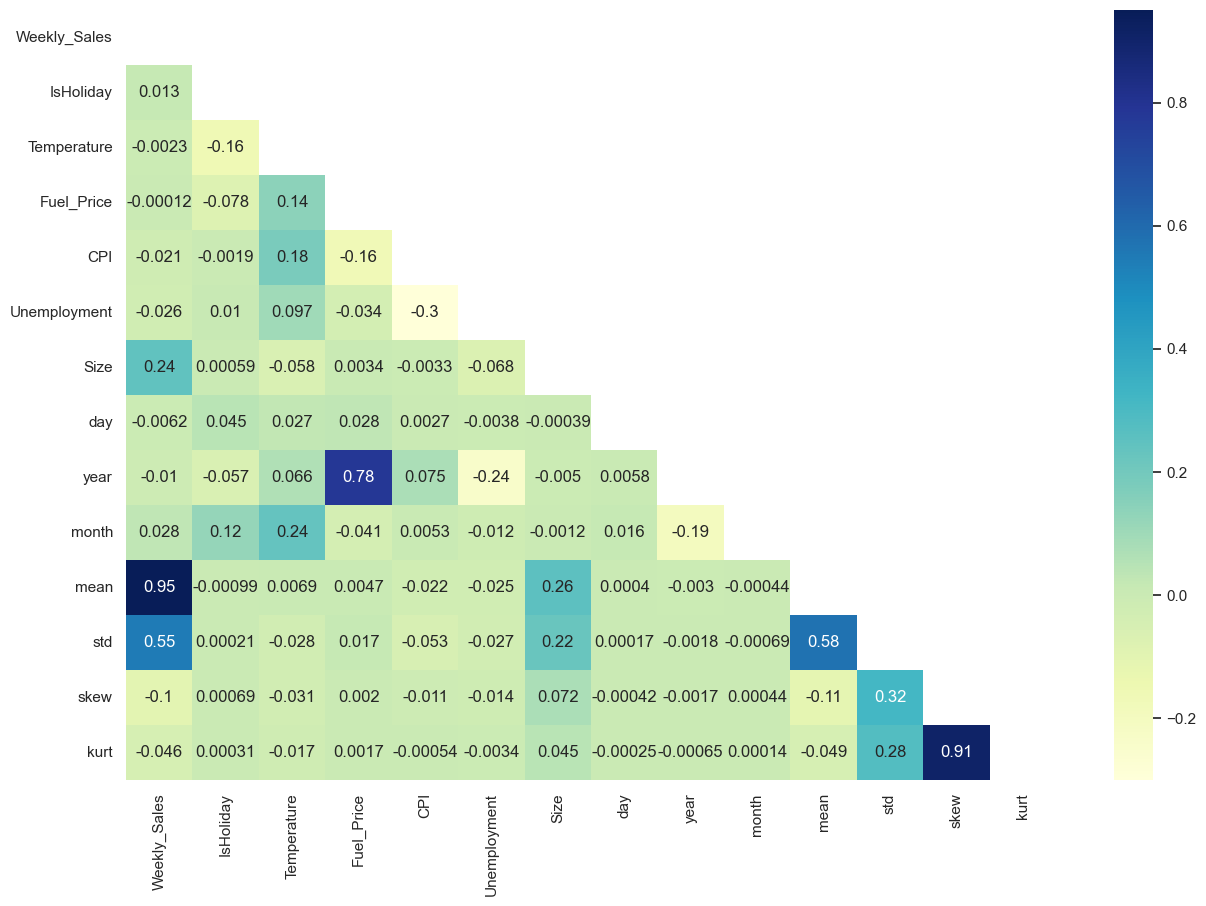

In [34]:
    # import modules
    import matplotlib.pyplot as mp
    import pandas as pd
    import seaborn as sns
    import numpy as np

    # import file with data
    data = new_data.drop(['week_day_x','Date'],axis= 1)

    # prints data that will be plotted
    # columns shown here are selected by corr() since
    # they are ideal for the plot
    # print(data.corr())
    mp.figure(figsize= (15,10))
    sns.set_theme(style="whitegrid")
    # plotting correlation heatmap
    mask = np.triu(np.ones_like(data.corr()))
    dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True,fmt='.2g',mask= mask)
    sns.set(rc = {'figure.figsize':(25,8)})

    # displaying heatmap
    mp.show()